# Import libraries

- Pandas is used for managing datasets
- Numpy is used for numerical operations
- MatPlotLib is used for plotting

In [853]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define variables

- Data_or, the data of the OR function (false=-1, true=+1)
- Dataset, the pandas dataframe with the data
- Learning_rate, e.g. the total "change" made while learning. The usage of it is described [here](https://en.wikipedia.org/wiki/Delta_rule)
- Weights, the importance of specified input
- Bias, the constant that is injected into the sum. You can find nice graph explaining it [here](https://www.researchgate.net/publication/327392288/figure/fig1/AS:666616886984704@1535945259693/The-graph-of-a-perceptron-x1-xm-are-input-signals-w1-wm-are-the-weights.png)
- Epochs, the maximum number of training iterations

In [854]:
data_or = np.array([[-1, -1, -1], [-1, +1, +1], [+1, -1, +1], [+1, +1, +1]])
dataset = pd.DataFrame(data_or, columns=['input1', 'input2', 'output'])
learning_rate = 0.1
weights = { 'weight0': -2, 'weight1': 0, 'weight2': -1 }
epochs = 100

# Define the function that computes the output of the perceptron


In [855]:
def output(row, weights):
    return 1 * weights['weight0'] + row['input1'] * weights['weight1'] + row['input2'] * weights['weight2']

# Define the function to plot the weights and the data points

In [856]:
def plot(iteration, old_weights, new_weights, previous_row):
    # start a new figure
    plt.figure(iteration)
    plt.axis([-4, 4, -4, 4])
    plt.title(f"Epoch={iteration + 1:03d} Weight0={new_weights['weight0']:+.1f} Weight1={new_weights['weight1']:+.1f} Weight2={new_weights['weight2']:+.1f}")

    # plot the new line
    new_xs = np.linspace(-4, 4, 2)
    new_ys = -(new_weights['weight1'] * new_xs + new_weights['weight0']) / new_weights['weight2']
    plt.plot(new_xs, new_ys, color='green')

    # plot the old line
    old_xs = np.linspace(-4, 4, 2)
    old_ys = -(old_weights['weight1'] * old_xs + old_weights['weight0']) / old_weights['weight2']
    plt.plot(old_xs, old_ys, color='grey', alpha=0.5)
    color_above, color_below = ('red', 'blue') if output({'input1': 0, 'input2': 100}, old_weights) > 0 else ('blue', 'red')
    plt.fill_between(old_xs, old_ys, 4, color=color_above, alpha=0.05)
    plt.fill_between(old_xs, old_ys, -4, color=color_below, alpha=0.05)

    # plot the data points
    for _, row in dataset.iterrows():
        plt.plot(row['input1'], row['input2'], marker='o', color='red' if row["output"] > 0 else 'blue', markersize=10)
    plt.plot(previous_row['input1'], previous_row['input2'], marker='o', color='red' if previous_row["output"] > 0 else 'blue', markersize=20)
    plt.tight_layout()

# There is our core of perceptron learning.

You can get good information on how it works [on the Toronto University ML Lecture no. 3](https://www.cs.toronto.edu/~hinton/coursera/lecture3/lec3.pdf)

Epoch=000 Weight0=-2.0 Weight1=+0.0 Weight2=-1.0 Wrong=3 Input1=+1 Input2=+1 Output=+1 Actual=-3.00 Error=+4.00 Ok=False
Epoch=001 Weight0=-1.6 Weight1=+0.4 Weight2=-0.6 Wrong=3 Input1=+1 Input2=-1 Output=+1 Actual=-0.60 Error=+1.60 Ok=False
Epoch=002 Weight0=-1.4 Weight1=+0.6 Weight2=-0.8 Wrong=3 Input1=-1 Input2=+1 Output=+1 Actual=-2.76 Error=+3.76 Ok=False
Epoch=003 Weight0=-1.1 Weight1=+0.2 Weight2=-0.4 Wrong=3 Input1=+1 Input2=-1 Output=+1 Actual=-0.50 Error=+1.50 Ok=False
Epoch=004 Weight0=-0.9 Weight1=+0.3 Weight2=-0.5 Wrong=3 Input1=-1 Input2=-1 Output=-1 Actual=-0.71 Error=-0.29 Ok=True
Epoch=005 Weight0=-0.9 Weight1=+0.3 Weight2=-0.5 Wrong=3 Input1=-1 Input2=+1 Output=+1 Actual=-1.78 Error=+2.78 Ok=False
Epoch=006 Weight0=-0.6 Weight1=+0.1 Weight2=-0.3 Wrong=3 Input1=+1 Input2=-1 Output=+1 Actual=-0.33 Error=+1.33 Ok=False
Epoch=007 Weight0=-0.5 Weight1=+0.2 Weight2=-0.4 Wrong=2 Input1=+1 Input2=-1 Output=+1 Actual=+0.07 Error=+0.93 Ok=True
Epoch=008 Weight0=-0.5 Weight1=+0.

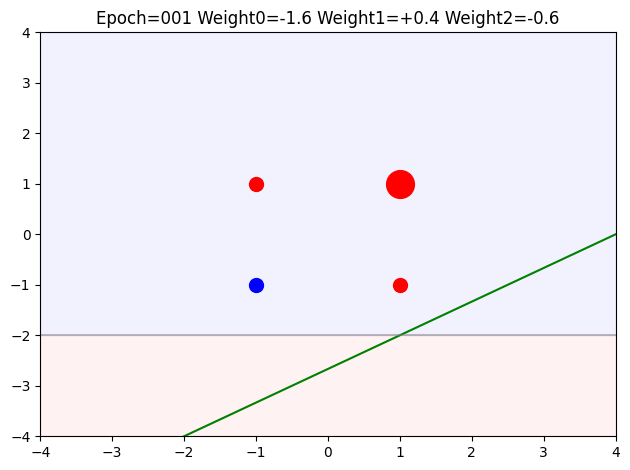

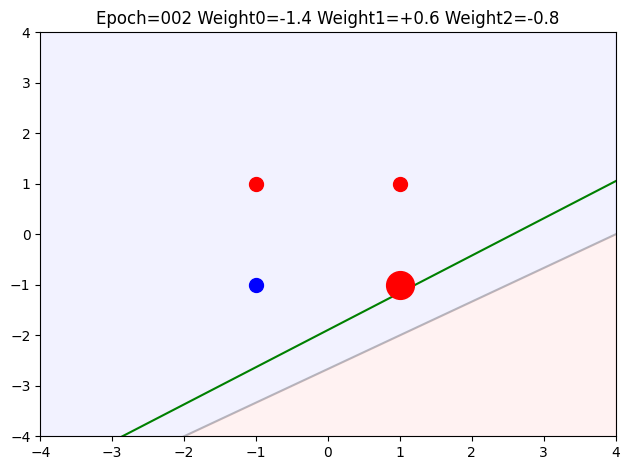

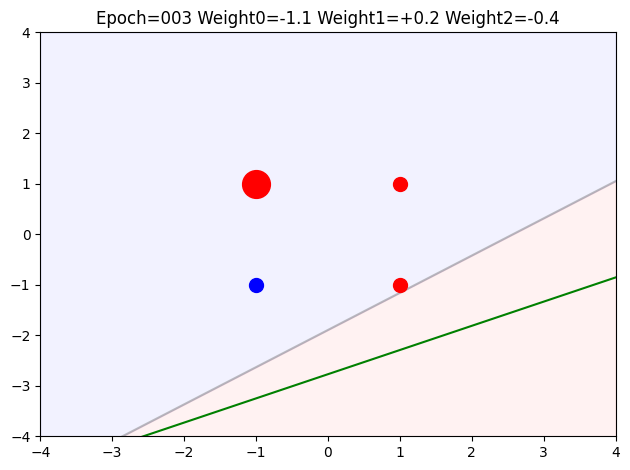

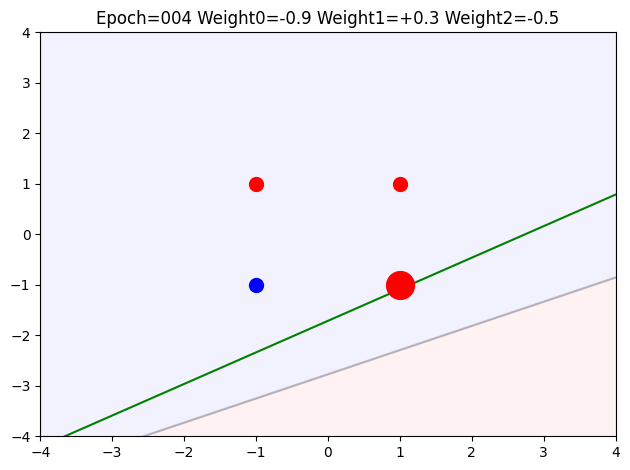

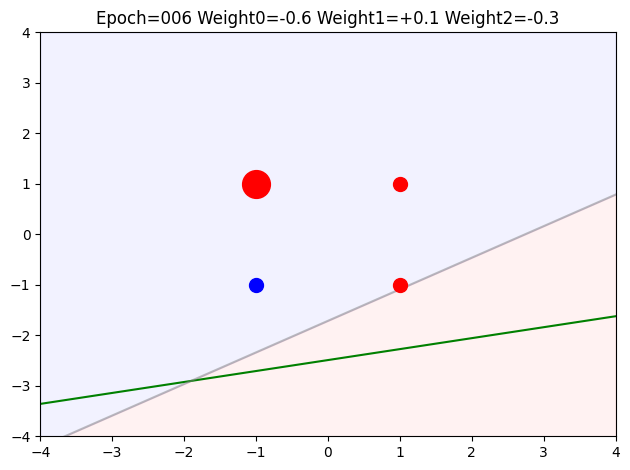

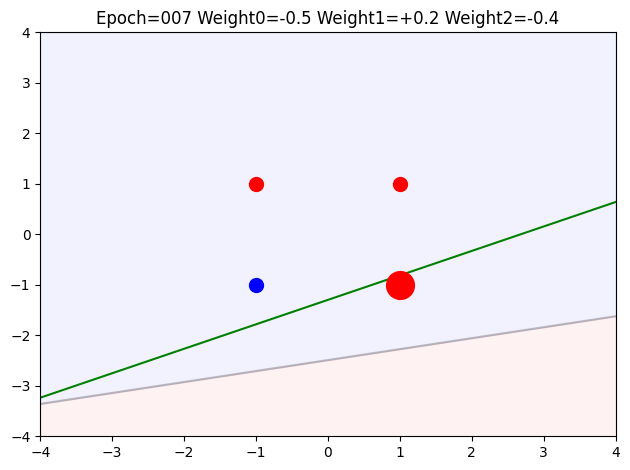

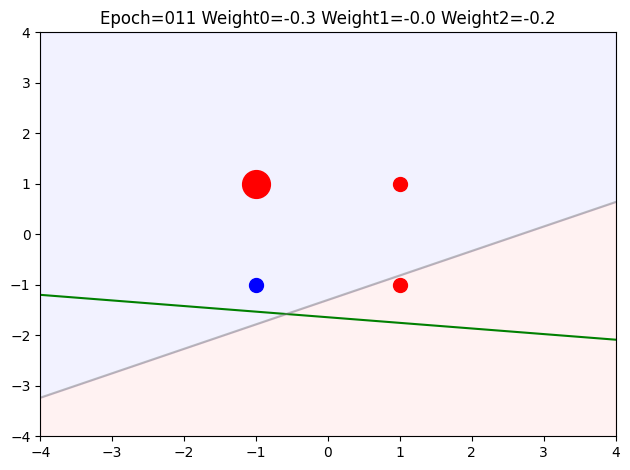

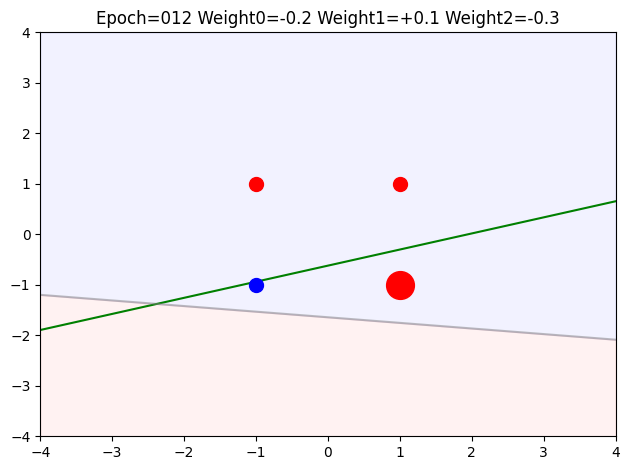

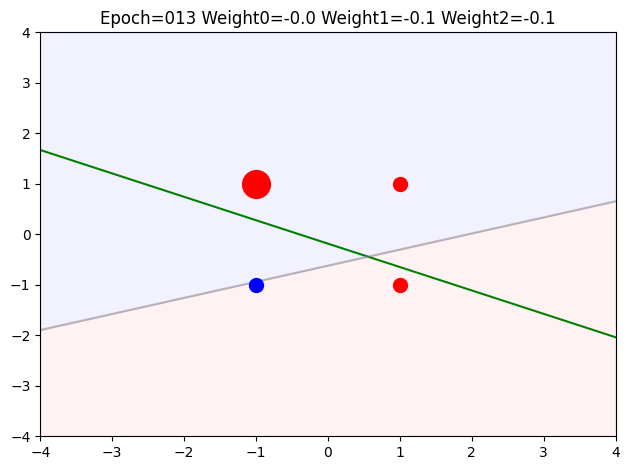

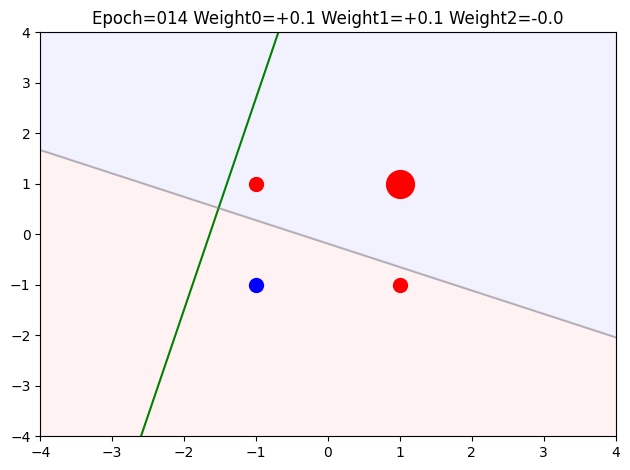

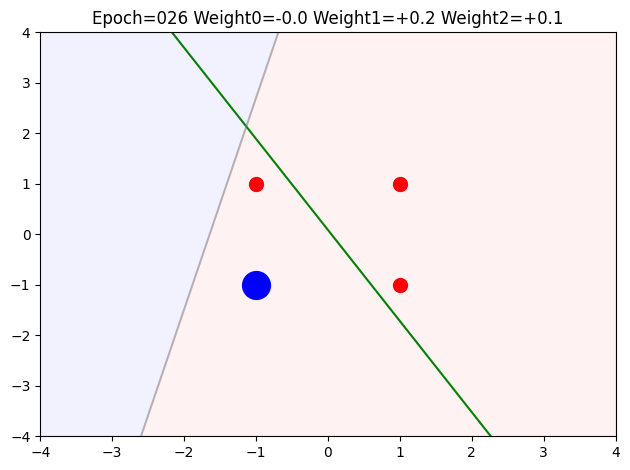

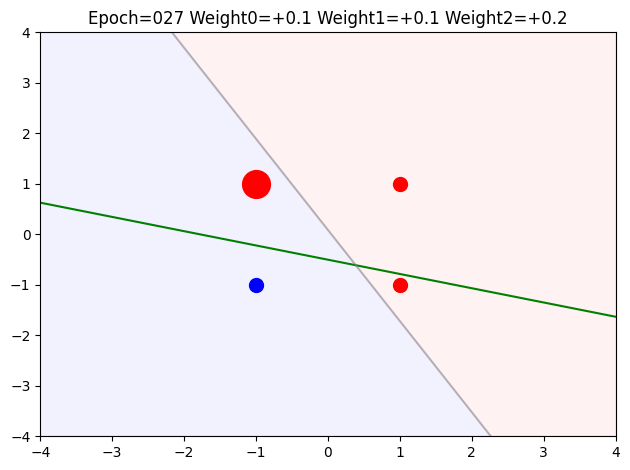

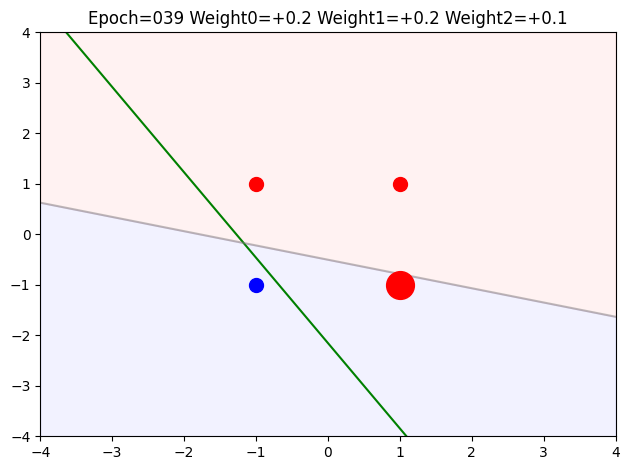

In [857]:
for epoch in range(epochs):
    print(f"Epoch={epoch:03d}", end=" ")
    print(f"Weight0={weights['weight0']:+.1f} Weight1={weights['weight1']:+.1f} Weight2={weights['weight2']:+.1f}", end=" ")

    # compute the number of wrong predictions
    wrong = sum([row["output"] * output(row, weights) < 0 for _, row in dataset.iterrows()])
    print(f"Wrong={wrong}", end=" ")
    if wrong == 0:
        break

    # pick a random row
    row = dataset.sample().iloc[0]
    actual = output(row, weights)
    error = row["output"] - actual
    ok = row["output"] * actual > 0
    print(f"Input1={row['input1']:+1d} Input2={row['input2']:+1d} Output={row['output']:+1d} Actual={actual:+.2f} Error={error:+.2f} Ok={ok}")
    
    # update the weights
    if not ok:
        previous_weights = dict(weights)
        weights['weight0'] += learning_rate * error
        weights['weight1'] += learning_rate * error * row['input1']
        weights['weight2'] += learning_rate * error * row['input2']
        plot(epoch, previous_weights, weights, row)
